In [1]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
end

function printer(x::Any, verbose="")
    if verbose != ""
        println(verbose)
    end
    show(stdout, "text/plain", x)
    println("")
end

 Activating environment at `~/Programming/julia/notebook/JuliaProbo/Project.toml`


printer (generic function with 2 methods)

In [2]:
using CSV, DataFrames, Plots, Statistics, StatsBase, Random, Distributions, LinearAlgebra
gr();

In [3]:
mutable struct IdealRobot
    pose_::Array{Float64, 1}
    radius_::Float64
    color_::String
    function IdealRobot(pose::AbstractArray{Float64, 1}, radius=0.2, color="blue")
        new([pose[1], pose[2], pose[3]], radius, color)
    end
end

function draw(robot::IdealRobot, p)
    p = scatter!([robot.pose_[1]], [robot.pose_[2]], markersize=robot.radius_ * 100, color=robot.color_, markeralpha=0.5, legend=nothing, aspect_ratio=:equal)
    θ = robot.pose_[3]
    p = quiver!([robot.pose_[1]], [robot.pose_[2]], quiver=([robot.radius_ * cos(θ)], [robot.radius_ * sin(θ)]),  lw=1, color="black")
end

mutable struct World
    objects_::Array{Any, 1}
    xlim_::Array{Float64, 1}
    ylim_::Array{Float64, 1}
    debug_::Bool
    function World(xlim::AbstractArray{Float64, 1}, ylim::AbstractArray{Float64, 1}, debug=false)
        new(Array{Any, 1}[], [xlim[1], xlim[2]], [ylim[1], ylim[2]], debug)
    end
end

function Base.push!(world::World, robot::IdealRobot)
    push!(world.objects_, robot)
end

function draw(world::World, anot=nothing)
    p = plot(aspect_ratio=:equal, xlim=world.xlim_, ylim=world.ylim_)
    for obj = world.objects_
        draw(obj, p)
    end
    return p
end

draw (generic function with 3 methods)

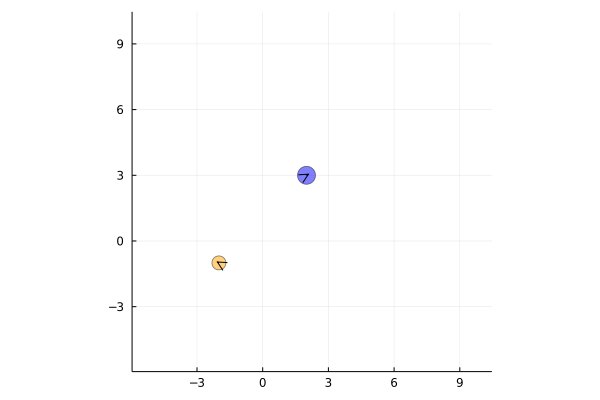

In [5]:
robot1 = IdealRobot([2.0, 3.0, pi/6], 0.1, "blue")
robot2 = IdealRobot([-2.0, -1.0, pi*5/6], 0.08, "orange")
xlim = [-5.5, 10]
ylim = [-5.5, 10]
world = World(xlim, ylim)
push!(world, robot1)
push!(world, robot2)
p = draw(world)